## Here, we calculate the distances between States (connectivity matrices for each timepoint)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from scipy.stats import zscore
from numpy.linalg import svd
from scipy.spatial.distance import pdist, squareform, cdist
from sklearn.manifold import TSNE, SpectralEmbedding,Isomap
from sklearn.neighbors import kneighbors_graph
from sklearn.utils.graph_shortest_path import graph_shortest_path
from sklearn.neighbors import NearestNeighbors
%run functions-py.py

In [3]:
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.5g" % x))

## Correlation between Salience-Executive-Default 

In [4]:
file="../Data/my_rois_net1_ordered.json"

In [5]:
networks=['Salience','Frontal-Parietal','Default']
my_dict=regions_from_json(file,networks,verbose=False)
regions=my_dict['array']
lengths=my_dict['length']
r=np.sum(lengths)
print(r)

74


In [6]:
lims=create_limits(lengths)
print(lims)

[0, 10, 30, 74]


In [7]:
regions[47:60]
regions[28:30]

array([68, 69])

### Dynamic correlation (Threshold)

We calculate the threshold to filter our connectivity matrices and apply it

In [22]:
slide=18

In [23]:
sliding_all_og=np.load('../Data/sliding_all_'+str(slide)+'.npy')
sliding_all_og
t_s, r_r = sliding_all_og.shape
print(t_s,r_r)

176 3321


In [24]:
# new=list(range(8,55))+list(range(68,82))
# r=len(new)
#new=list(range(8,36))+list(range(38,82))
#r=len(new)

In [25]:
#sliding_all_og=[squareform(squareform(sliding_all_og[i,:])[np.ix_(new,new)]) for i in range(t_s)]
sliding_all_og=[squareform(squareform(sliding_all_og[i,:])[8:,8:]) for i in range(t_s)] #first 8 regions are not in our networks
sliding_all_og=np.array(sliding_all_og)

In [26]:
t_s, r_r = sliding_all_og.shape
print(t_s,r_r)

176 2701


In [27]:
alpha=find_alpha_by_density(sliding_all_og,alpha=0.36,step=0.01)
#=alpha=0.37
print(alpha)

0.37


In [28]:
#sliding_all=sliding_all_og
sliding_all=sliding_all_og*(sliding_all_og>alpha)

In [29]:
corr_din=np.zeros((t_s,r,r)) 
for i in range(t_s):
    corr_din[i,:,:]=squareform(sliding_all[i,])

### Distance between matrices of points 

In [30]:
#dist=pdist(sliding_all,metric='cityblock')
dist=pdist(sliding_all,metric='cityblock')

In [31]:
og_dist=squareform(dist)
print(og_dist.shape)

(176, 176)


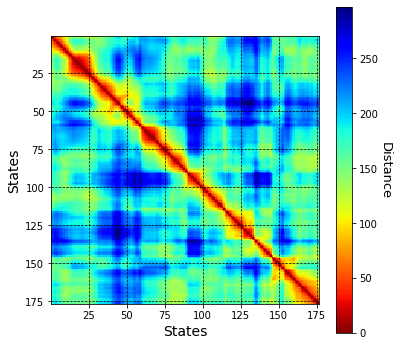

In [32]:
fig =plt.figure(figsize=(6,6))
plt.imshow(og_dist,cmap=plt.get_cmap('jet_r'),interpolation='nearest')

plt.xlabel('States',fontsize=14)
plt.ylabel('States',fontsize=14)

g=25
ticks=np.arange(g-1,t_s+1,g)
plt.xticks(ticks=ticks,labels=ticks+1)
plt.yticks(ticks=ticks,labels=ticks+1)

cbar=plt.colorbar()
cbar.ax.set_ylabel('Distance',rotation=270,fontsize=13,labelpad=14)


#for i in [28,40,60,78,113,145]:
for i in ticks[0:7]:
    plt.axvline(x=i,color='black',linestyle='dashed',linewidth=0.7)
    plt.axhline(y=i,color='black',linestyle='dashed',linewidth=0.7)
#plt.savefig('../Imagenes/thesis/all_l1-thres_dist.pdf',bbox_inches='tight')

In [33]:
np.save('../Data/dist/all_l1-thres.npy',og_dist.astype(np.float64))

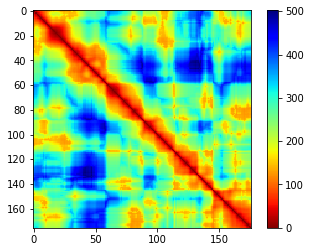

In [34]:
n_neigh=30
nbrs = NearestNeighbors(n_neighbors=n_neigh,metric='precomputed')
nbrs.fit(og_dist)

Aff = kneighbors_graph(nbrs, n_neigh,metric='precomputed',mode='distance')
#Aff = (Aff + Aff.T)/2
plt.imshow(Aff.toarray())
geo_dist = graph_shortest_path(Aff, directed=False)

plt.imshow(geo_dist,cmap=plt.get_cmap('jet_r'),interpolation='nearest')
cbar=plt.colorbar()

In [35]:
np.save('../Data/dist/all_l1-thres-geo.npy',geo_dist.astype(np.float64))

### Dynamic correlation (No threshold)

We do the same calculations without threshold

In [23]:
slide=18

In [24]:
sliding_all_og=np.load('../Data/sliding_all_'+str(slide)+'.npy')
sliding_all_og
t_s, r_r = sliding_all_og.shape
print(t_s,r_r)

176 3321


In [25]:
#sliding_all_og=[squareform(squareform(sliding_all_og[i,:])[np.ix_(new,new)]) for i in range(t_s)]
sliding_all_og=[squareform(squareform(sliding_all_og[i,:])[8:,8:]) for i in range(t_s)]
sliding_all_og=np.array(sliding_all_og)

In [26]:
t_s, r_r = sliding_all_og.shape
print(t_s,r_r)

176 2701


In [27]:
#alpha=find_alpha_by_density(sliding_all_og,alpha=0.36,step=0.01)
alpha=0
print(alpha)

0


In [28]:
#sliding_all=sliding_all_og
sliding_all=sliding_all_og*(sliding_all_og>alpha)

In [29]:
corr_din=np.zeros((t_s,r,r)) 
for i in range(t_s):
    corr_din[i,:,:]=squareform(sliding_all[i,])

### Distance between matrices of points 

In [30]:
#dist=pdist(sliding_all,metric='cityblock')
dist=pdist(sliding_all,metric='cityblock')

In [31]:
og_dist=squareform(dist)
print(og_dist.shape)

(176, 176)


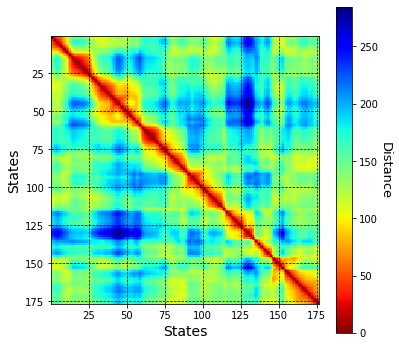

In [34]:
fig =plt.figure(figsize=(6,6))
plt.imshow(og_dist,cmap=plt.get_cmap('jet_r'),interpolation='nearest')

plt.xlabel('States',fontsize=14)
plt.ylabel('States',fontsize=14)

g=25
ticks=np.arange(g-1,t_s+1,g)
plt.xticks(ticks=ticks,labels=ticks+1)
plt.yticks(ticks=ticks,labels=ticks+1)

cbar=plt.colorbar()
cbar.ax.set_ylabel('Distance',rotation=270,fontsize=13,labelpad=14)


#for i in [28,40,60,78,113,145]:
for i in ticks[0:7]:
    plt.axvline(x=i,color='black',linestyle='dashed',linewidth=0.7)
    plt.axhline(y=i,color='black',linestyle='dashed',linewidth=0.7)
plt.savefig('../Imagenes/thesis/all_l1-nothres_dist.pdf',bbox_inches='tight')

In [35]:
np.save('../Data/dist/all_l1-nothres.npy',og_dist.astype(np.float64))

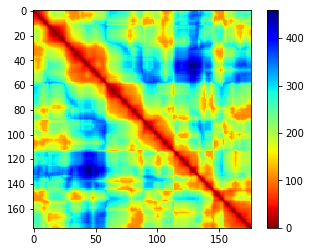

In [36]:
n_neigh=30
nbrs = NearestNeighbors(n_neighbors=n_neigh,metric='precomputed')
nbrs.fit(og_dist)

Aff = kneighbors_graph(nbrs, n_neigh,metric='precomputed',mode='distance')
#Aff = (Aff + Aff.T)/2
plt.imshow(Aff.toarray())
geo_dist = graph_shortest_path(Aff, directed=False)

plt.imshow(geo_dist,cmap=plt.get_cmap('jet_r'),interpolation='nearest')
cbar=plt.colorbar()

In [37]:
np.save('../Data/dist/all_l1-nothres-geo.npy',geo_dist.astype(np.float64))